In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


odasdf = pd.read_csv("//Users/rbalbuen/Desktop/odasrepo2/tlm-data/train/generated/engineered/Battery1_telemetryOutputData_2020_02_05_15_48_33.csv", skiprows=[i for i in range(1,8)])
num_rows= odasdf.shape[0]
print(num_rows)

splitdf= num_rows*0.70
print(splitdf)
train_data = odasdf.iloc[:int(splitdf)]
test_data = odasdf.iloc[int(splitdf):]
print(train_data)
print(test_data)

6886
4820.2
      Value       Avg3    Stdev3  Minimum3  Maximum3  Fluctuation3   Avg5  \
0      12.0  11.233333  0.230940      11.1      11.5           0.4  11.34   
1      11.5  11.533333  0.450925      11.1      12.0           0.9  11.48   
2      11.4  11.666667  0.288675      11.5      12.0           0.5  11.44   
3      12.0  11.633333  0.321455      11.4      12.0           0.6  11.50   
4      11.1  11.633333  0.321455      11.4      12.0           0.6  11.68   
...     ...        ...       ...       ...       ...           ...    ...   
4815   12.4  11.200000  0.100000      11.1      11.3           0.2  11.50   
4816   12.4  11.566667  0.723418      11.1      12.4           1.3  11.64   
4817   11.0  12.000000  0.692820      11.2      12.4           1.2  11.68   
4818   12.6  11.933333  0.808290      11.0      12.4           1.4  11.62   
4819   12.8  12.000000  0.871780      11.0      12.6           1.6  11.92   

        Stdev5  Minimum5  Maximum5  ...       Avg7    Stdev7  M

In [60]:
feature_cols = ['Avg3',
 'Stdev3',
 'Minimum3',
 'Maximum3',
 'Fluctuation3',
 'Avg5',
 'Stdev5',
 'Minimum5',
 'Maximum5',
 'Fluctuation5',
 'Avg7',
 'Stdev7',
 'Minimum7',
 'Maximum7',
 'Fluctuation7',
 'Hour',
 'Minute',
 'Second',
 'Microsecond']
X_train = train_data[feature_cols]
y_train = train_data['Value']
X_test = test_data[feature_cols]
y_test = test_data['Value']


In [61]:
# X_train['Avg3'] = X_train['Avg3'].values + [2]
# temp = pd.DataFrame({'Avg3':[2]})
# temp.head()
# X_train.append(temp,ignore_index=True)


In [62]:

rfreg =  RandomForestRegressor(max_depth=2, random_state=0)
rfreg.fit(X_train, y_train)
y_predict_rf = rfreg.predict(X_test)
print(y_predict_rf)
mse = metrics.mean_squared_error(y_test, y_predict_rf)
rmse = np.sqrt(mse)

print('Root mean square error value is: ', rmse)



[12.0043714  11.99644292 12.00530574 ... 11.9563483  11.96354068
 11.98870401]
Root mean square error value is:  0.5837528396099121


In [63]:
# mse_list = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')

# mse_list_positive = -mse_list
# rmse_list = np.sqrt(mse_list_positive)
# print(rmse_list)
# print('RMSE list mean is: ' , rmse_list.mean())

In [64]:
# X_test2 = X_test.iloc[[ -1]]
# X_test2.head()

In [65]:
actualpreddf = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_predict_rf.flatten()})
print(actualpreddf.head(50))

    Actual  Predicted
0     12.4  12.004371
1     11.5  11.996443
2     11.5  12.005306
3     11.2  11.966015
4     11.5  11.983800
5     12.2  11.967257
6     11.1  11.971460
7     11.1  11.953691
8     12.5  11.957126
9     12.0  11.984571
10    11.4  11.994652
11    11.7  11.980739
12    11.7  11.981144
13    12.5  11.947164
14    12.5  11.966019
15    11.5  11.963770
16    12.4  11.964091
17    11.2  11.964091
18    12.8  11.973993
19    12.4  11.992759
20    11.7  11.989333
21    11.1  11.989849
22    11.0  11.993626
23    12.7  11.987566
24    11.1  12.004627
25    11.1  11.996196
26    11.7  11.983478
27    11.6  11.970625
28    11.7  11.990966
29    12.4  11.950380
30    11.4  11.973708
31    11.3  11.967985
32    11.0  11.970840
33    12.1  11.931212
34    12.8  11.979466
35    12.8  12.004272
36    11.4  12.002069
37    11.2  12.006249
38    11.2  11.994488
39    12.4  11.992125
40    11.9  11.994629
41    11.9  11.978995
42    12.2  11.974750
43    12.4  11.919585
44    12.3

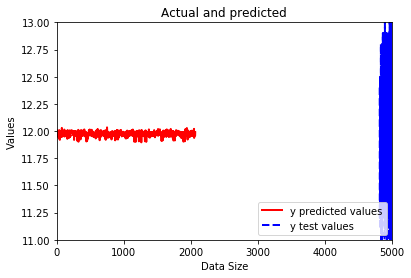

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()

plt.plot(y_predict_rf, color='red', lw=2,label='y predicted values')

plt.plot(y_test, color='blue', lw=2, linestyle='--',label='y test values')

plt.xlim([0, 5000])
plt.ylim([11, 13])

plt.xlabel('Data Size')
plt.ylabel('Values')
plt.title('Actual and predicted')
plt.legend(loc="lower right")

plt.show()